### Basic Classification
using tensorflow on Fashion MNIST Dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

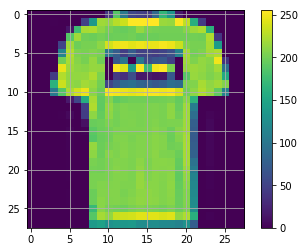

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(True)

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

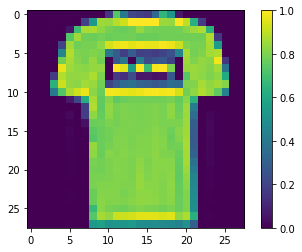

In [9]:
plt.imshow(train_images[1])
plt.colorbar()

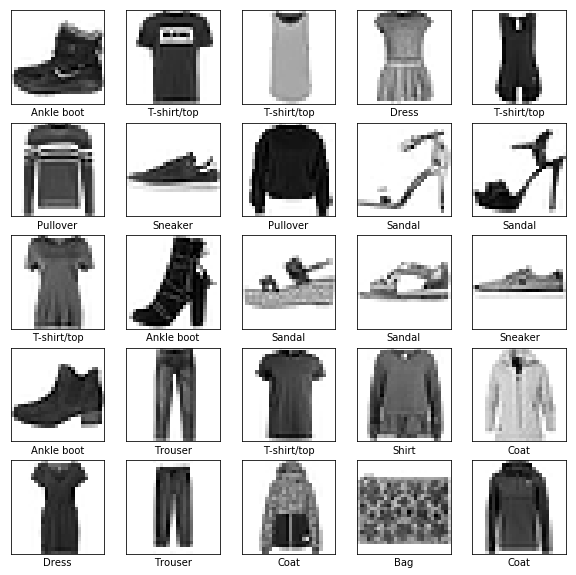

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # disable x ticks
    plt.yticks([]) # disable y ticks
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [27]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2811 - acc: 0.8960
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2699 - acc: 0.9000
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2564 - acc: 0.9046
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2478 - acc: 0.9074
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2381 - acc: 0.9109
Epoch 6/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2304 - acc: 0.9129
Epoch 7/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.2233 - acc: 0.9157
Epoch 8/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.2172 - acc: 0.9191
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2099 - acc: 0.9221
Epoch 10/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.2043 - acc: 0.9229

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 22us/step
Test accuracy: 0.8874


In [38]:
predictions = model.predict(test_images)


In [39]:
predictions[0]

array([  1.81489703e-08,   3.05540342e-13,   1.64977147e-11,
         8.90905960e-11,   5.26517330e-10,   4.80122890e-06,
         6.69709954e-10,   1.08597381e-03,   3.11260107e-09,
         9.98909235e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

In [41]:
test_labels[0]

9

/home/darkghost/anaconda3/envs/MLenv/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


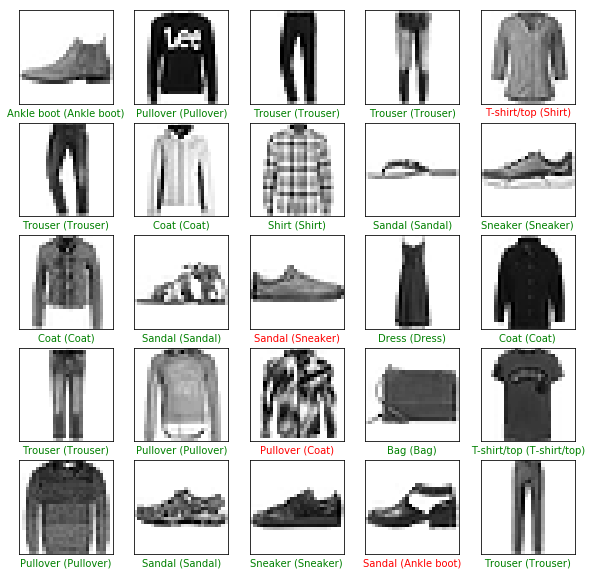

In [43]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
      

In [44]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)


(28, 28)


In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [46]:
predictions = model.predict(img)

print(predictions)

[[  1.81489703e-08   3.05539746e-13   1.64976522e-11   8.90904295e-11
    5.26518329e-10   4.80123344e-06   6.69708677e-10   1.08597439e-03
    3.11260706e-09   9.98909235e-01]]


In [47]:
prediction = predictions[0]

np.argmax(prediction)

9